# Quantium Project Data Analysis Report


## Introduction
This report provides an analysis of customer purchase behavior of a fictional chips company as well as transaction behaviour.
Two dataset, **Q_Purchase_Behaviour** and **Q_Transaction_Data**, which can be accessed on [Forage](https://theforage.com)

## Objective
The goal of this project is leverage python to examine and clean transaction and customer data, identify customer segments based on purchasing behaviour, create charts and graphs to drive commercial recommendations from analysis.

In [7]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Inspection and Cleaning

In [ ]:
# Load Purchase Behaviour Dataset

In [9]:
customer_df= pd.read_excel("Q_Purchase_Behaviour.xlsx")

# Load Customer Transaction Dataset
transactions_df= pd.read_excel("Q_Transaction_Data.xlsx")

In [11]:
# Display first 5 rows of customer dataset
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
# Displat first 5 rows of customer dataset
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
# identify the columns in the customer dataset
customer_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [17]:
# describing the dataset
transactions_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [19]:
# check for nulls in customer dataset
customer_df.isnull()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72632,False,False,False
72633,False,False,False
72634,False,False,False
72635,False,False,False


In [21]:
# checking for nulls in transaction dataset
transactions_df.isnull()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
264831,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False
264833,False,False,False,False,False,False,False,False
264834,False,False,False,False,False,False,False,False


In [23]:
# chceking for information about the dataset
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [25]:
# checking for information on the customer dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# checking the length of the row
len(customer_df)
print("Number of rows in the customer table :", len(customer_df) )

Number of rows in the customer table : 72637


In [29]:
# sorting transactions data table according to total sales
transactions_df.sort_values(by='TOT_SALES',ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
259695,2018-11-13,41,41089,38002,76,Woolworths Medium Salsa 300g,1,1.5
259707,2018-10-18,41,41267,38201,76,Woolworths Medium Salsa 300g,1,1.5
197005,2018-08-11,167,167121,168928,76,Woolworths Medium Salsa 300g,1,1.5
216449,2019-03-01,264,264032,262778,76,Woolworths Medium Salsa 300g,1,1.5


In [31]:
#removing the rows with outliers, != means not equal to
transactions_df= transactions_df[transactions_df['PROD_QTY'] !=200]
transactions_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [33]:
# verifying changes
transactions_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


In [35]:
#merging both tables using loyalty card as reference
merged_df= pd.merge(transactions_df, customer_df, on='LYLTY_CARD_NBR')
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [37]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [39]:
merged_df['STORE_NBR'] = merged_df['STORE_NBR'].astype(str)
merged_df['STORE_NBR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 264834 entries, 0 to 264833
Series name: STORE_NBR
Non-Null Count   Dtype 
--------------   ----- 
264834 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


## Calculating Key Measure

In [41]:
total_sales= merged_df['TOT_SALES'].sum()
print('Total Sales is', total_sales, 'dollars')

total_qty= transactions_df['PROD_QTY'].sum()
print('Total quantity is', total_qty, 'units')

total_members= customer_df['LYLTY_CARD_NBR'].nunique()
print('Total members is', total_members)

Total Sales is 1933115.0000000002 dollars
Total quantity is 504724 units
Total members is 72637


## Creating Visuals

In [43]:
# displaying total sales by category and top 5 products
total_sales_by_category= merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_5_products = total_sales_by_category.sort_values(by='TOT_SALES', ascending=False).head(5)
top_5_products

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,39052.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6


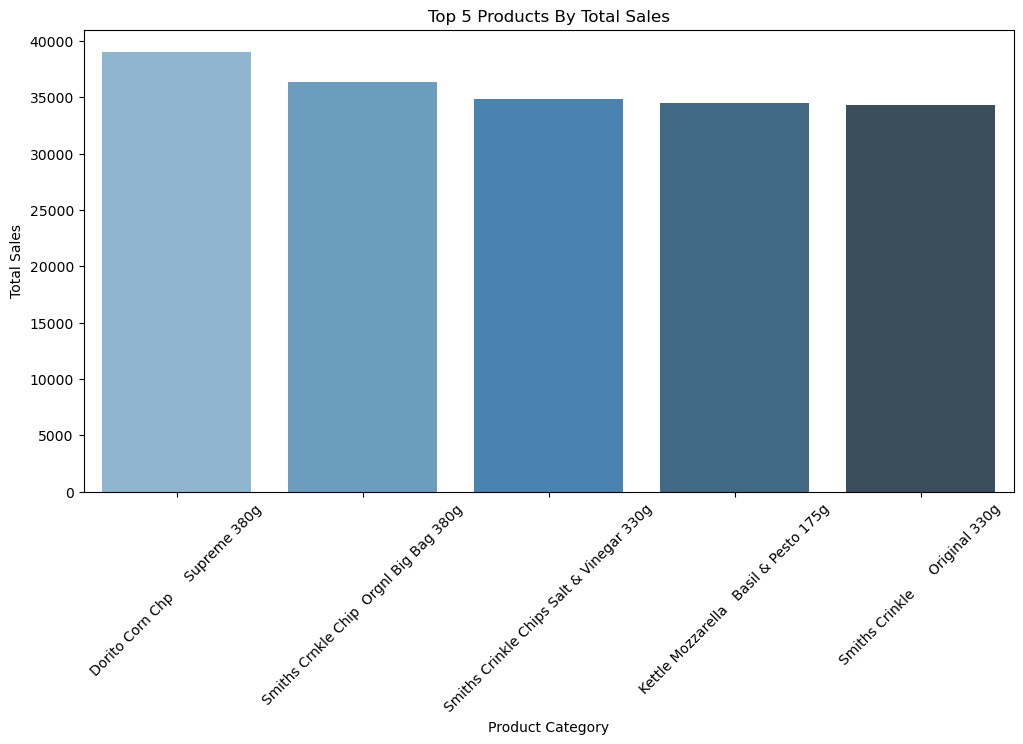

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='PROD_NAME', y='TOT_SALES', data=top_5_products, palette= 'Blues_d', hue='PROD_NAME')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Top 5 Products By Total Sales')
plt.xticks(rotation= 45)
plt.show()

In [49]:
# Calculate the value counts for the PREMIUM_CUSTOMER column
premium_customer_counts= customer_df['PREMIUM_CUSTOMER'].value_counts()
premium_customer_counts

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

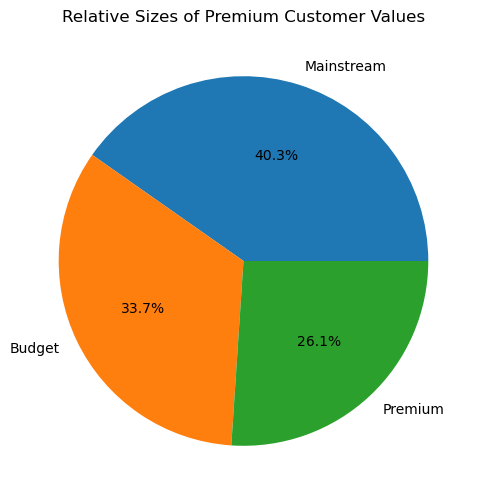

In [161]:
plt.figure(figsize=(6,6))

premium_customer_counts.plot(kind='pie', autopct='%1.1f%%', color=sns.color_palette('bright'))
plt.title('Relative Sizes of Premium Customer Values')
plt.ylabel('')
plt.show()

In [65]:
# Calculate the total sales sold by store
total_sales_by_store = merged_df.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
# sort by total sales and get the top 5 stores
top_5_stores_by_sales= total_sales_by_store.sort_values(by='TOT_SALES', ascending=False).head(5)
top_5_stores_by_sales

,STORE_NBR,TOT_SALES
141,226,17605.45
259,88,16333.25
73,165,15973.75
207,40,15559.50
153,237,15539.50


,STORE_NBR,TOT_SALES
141,226,17605.45
259,88,16333.25
73,165,15973.75
207,40,15559.50
153,237,15539.50


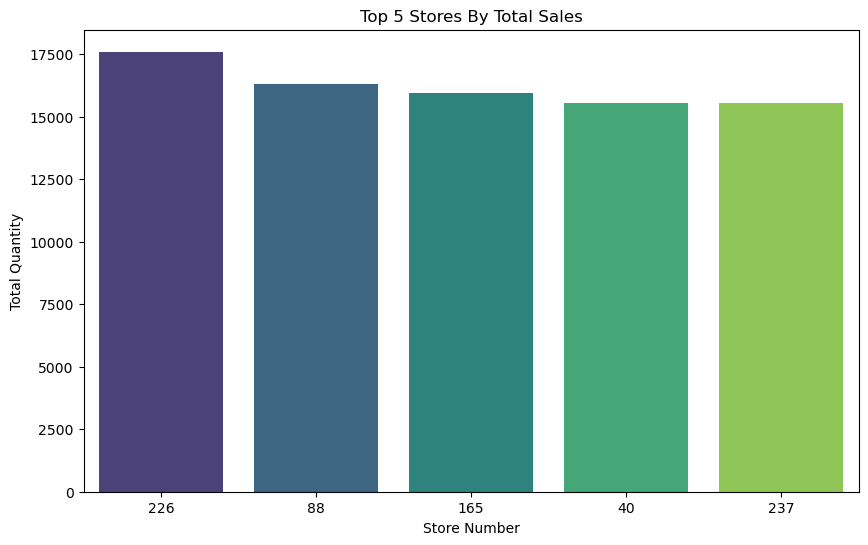

In [69]:
# Plotting the bar graph
plt.figure(figsize=(10,6))
sns.barplot(x='STORE_NBR', y='TOT_SALES', data=top_5_stores_by_sales, palette='viridis', hue='STORE_NBR')
plt.ylabel('Total Quantity')
plt.xlabel('Store Number')
plt.title('Top 5 Stores By Total Sales')
top_5_stores_by_sales

In [157]:
# Calculate the total stores by Quantity
total_quantity_by_store = merged_df.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
# sort by total sales and get the top 5 quantity
top_5_stores_by_quantity= total_quantity_by_store.sort_values(by='PROD_QTY', ascending=False).head(5)
top_5_stores_by_quantity

,STORE_NBR,PROD_QTY
141,226,4001
259,88,3718
265,93,3639
73,165,3602
210,43,3519


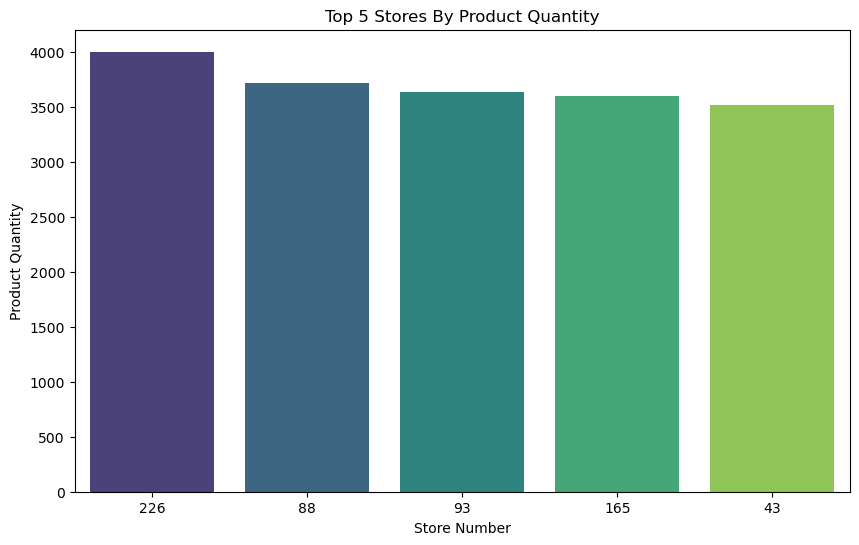

In [159]:
# Plotting the bar graph
plt.figure(figsize=(10,6))
sns.barplot(x='STORE_NBR', y='PROD_QTY', data=top_5_stores_by_quantity, palette='viridis', hue='STORE_NBR')
plt.ylabel('Product Quantity')
plt.xlabel('Store Number')
plt.title('Top 5 Stores By Product Quantity')
plt.show()

In [71]:
# Calculate the total sales by lifestage
sales_lifestage = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# sort by total sales and lifestage
sales_lifestage.sort_values(by='TOT_SALES', ascending=False)

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


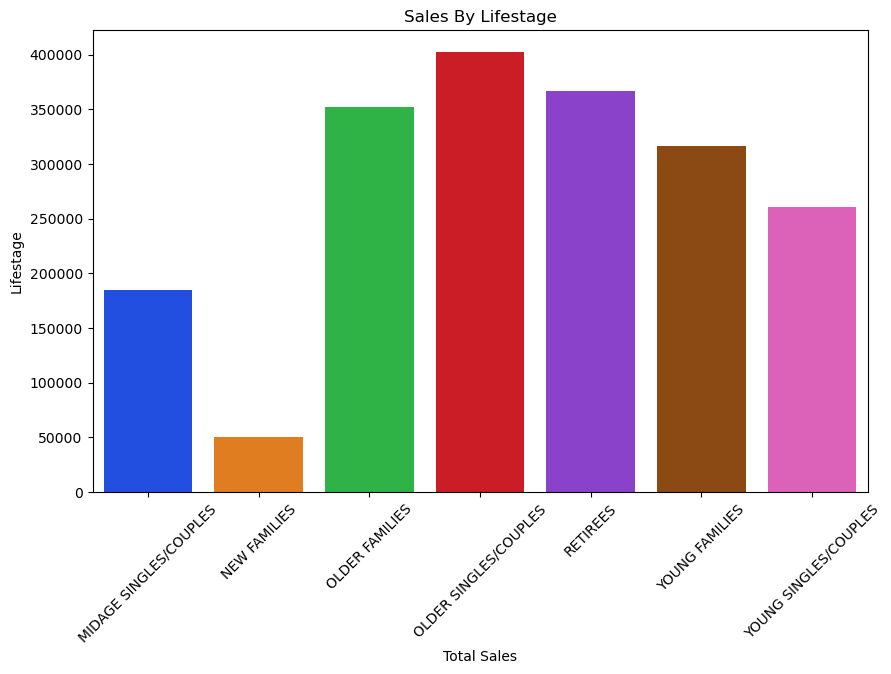

In [73]:
# Plotting the bar graph
plt.figure(figsize=(10,6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=sales_lifestage, palette='bright', hue='LIFESTAGE')
plt.ylabel('Lifestage')
plt.xlabel('Total Sales')
plt.title('Sales By Lifestage')
plt.xticks(rotation=45)
plt.show()

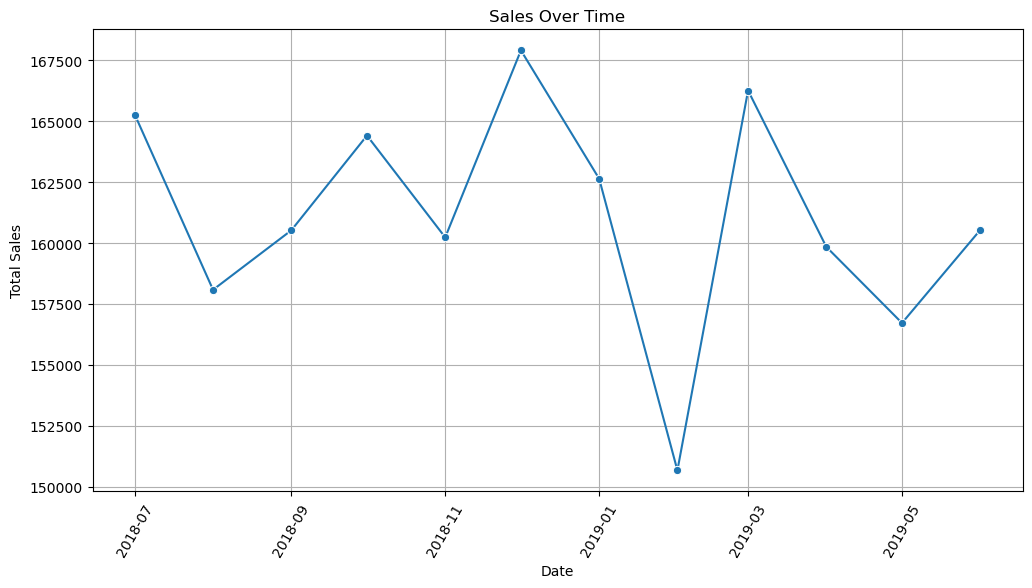

In [75]:
# Create 'MONTH_YEAR' column
merged_df['MONTH_YEAR'] = merged_df['DATE'].dt.to_period('M').dt.to_timestamp()
 # calculate sales over time
sales_over_time= merged_df.groupby('MONTH_YEAR')['TOT_SALES'].sum().reset_index()

#plotting the line chart with seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x='MONTH_YEAR', y='TOT_SALES', data=sales_over_time, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.xticks(rotation=60)
plt.show()